In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
da_HTS1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv", encoding = 'cp949')
da_HTS2 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv", encoding = 'cp949' )
da_HTS3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv", encoding = 'cp949')
da_HTS4 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv", encoding = 'cp949')

da_plan = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv",encoding = 'cp949')

da_member1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv", encoding = 'cp949')
da_member2 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv", encoding = 'cp949')
da_member3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv", encoding = 'cp949')
da_member4 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv", encoding = 'cp949')

da_hit1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv", encoding = 'cp949')
da_hit2 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv", encoding = 'cp949')
da_hit3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv", encoding = 'cp949')
da_hit4 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv", encoding = 'cp949')

da_team = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv", encoding = 'cp949')

In [3]:
# mapping index
a = {}
for i in range(len(da_member1)):
    a[da_member1["PCODE"][i]] = da_member1["NAME"][i]

# mapping 
P_to_N = []
for i in da_HTS1["PCODE"]:
    P_to_N.append(a.get(i))

In [175]:
indexs = [3,6,7,8,9,10]
da_HTS1.iloc[:,indexs]


da_2018ver = da_HTS1.iloc[:,indexs]
#da_2018ver["NAME"] = P_to_N
da_2018ver.insert(1,"NAME", P_to_N)
da_2018ver

da_2018ver.iloc[:,2:5]

,HIT_VEL,HIT_ANG_VER,HIT_RESULT
0,131.50,42.7,플라이
1,135.18,9.9,1루타
2,152.41,2.1,1루타
3,113.72,13.5,1루타
4,54.11,16.4,번트안타
...,...,...,...
35024,161.12,-7.4,1루타
35025,131.71,26.4,플라이
35026,119.64,28.8,플라이
35027,164.98,15.7,직선타


In [23]:
da_2018ver["HIT_RESULT"].value_counts()

플라이          9681
1루타          8408
땅볼아웃         7977
2루타          2519
홈런           1708
파울플라이        1125
직선타          1122
병살타           925
내야안타(1루타)     577
희생플라이         412
희생번트          212
3루타           180
인필드플라이         83
번트안타           42
번트아웃           38
야수선택           20
Name: HIT_RESULT, dtype: int64

In [21]:
da_2018ver["HIT_RESULT"].unique()

array(['플라이', '1루타', '번트안타', '땅볼아웃', '홈런', '2루타', '파울플라이', '3루타', '직선타',
       '희생번트', '내야안타(1루타)', '희생플라이', '병살타', '인필드플라이', '번트아웃', '야수선택'],
      dtype=object)

## 어떻게 하면, Nominal value 를 ordinal로 혹은 숫자로 바꿀 수 있을까?
 1) 단순, 1루타, 2루타, 3루타, 홈런을 1,2,3,4 로 표현하자
 
 2) 이 때, 나머지, 직선타, 플라이, 인필드플라이, 희생플라이는 어떻게 판단할까?
 
 3) 희생번트, 내야안타는?
 
 4) 나머지는?
 
 
 
$\rightarrow$ 결론 **out은 -1** 로 / **희생은 0으로** / **1루타 : 1** / **2루타 : 2** / **3루타 : 3**/ **홈런 : 4**


scatter plot 으로 

아웃/ 1루타/2루타/ 3루타/ 4루타 를 scatter 해보고, 

타격속도와 타격 각도에 따른, 결과를 파악해보자.
 - regrssion model 
 - random forest
 - logistic regression
 

In [12]:
da_2018ver["HIT_RESULT"].value_counts()

플라이          9681
1루타          8408
땅볼아웃         7977
2루타          2519
홈런           1708
파울플라이        1125
직선타          1122
병살타           925
내야안타(1루타)     577
희생플라이         412
희생번트          212
3루타           180
인필드플라이         83
번트안타           42
번트아웃           38
야수선택           20
Name: HIT_RESULT, dtype: int64

In [11]:
Z = da_2018ver["HIT_RESULT"].unique()
Z

array(['플라이', '1루타', '번트안타', '땅볼아웃', '홈런', '2루타', '파울플라이', '3루타', '직선타',
       '희생번트', '내야안타(1루타)', '희생플라이', '병살타', '인필드플라이', '번트아웃', '야수선택'],
      dtype=object)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
base_1 = da_2018ver[da_2018ver["HIT_RESULT"] =="1루타"]
base_2 = da_2018ver[da_2018ver["HIT_RESULT"] =="2루타"]
base_3 = da_2018ver[da_2018ver["HIT_RESULT"] =="3루타"]
base_4 = da_2018ver[da_2018ver["HIT_RESULT"] =="홈런"]

#plt.scatter(base_1["HIT_VEL"], base_1["HIT_ANG_VER"], 'ro')

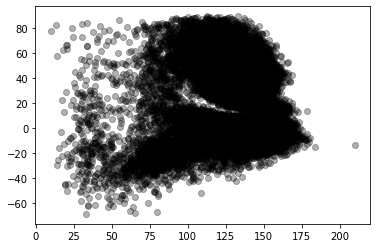

In [47]:
condition = (da_2018ver["HIT_RESULT"] !="1루타") & (da_2018ver["HIT_RESULT"] !="2루타") & (da_2018ver["HIT_RESULT"] !="3루타") & (da_2018ver["HIT_RESULT"] !="홈런")
base_0 = da_2018ver[condition]

plt.scatter(base_0["HIT_VEL"], base_0["HIT_ANG_VER"], marker = 'o', color = 'black', alpha = 0.3)

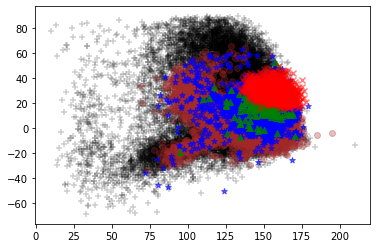

In [54]:
plt.scatter(base_0["HIT_VEL"], base_0["HIT_ANG_VER"], marker = '+', color = 'black', alpha = 0.2)
plt.scatter(base_1["HIT_VEL"], base_1["HIT_ANG_VER"], marker = 'o', color = 'brown', alpha = 0.3)
plt.scatter(base_2["HIT_VEL"], base_2["HIT_ANG_VER"], marker = '*', color = 'blue', alpha = 0.6)
plt.scatter(base_3["HIT_VEL"], base_3["HIT_ANG_VER"], marker = '^', color = 'green', alpha = 0.8)
plt.scatter(base_4["HIT_VEL"], base_4["HIT_ANG_VER"], marker = 'x', color = 'red',alpha = 0.5)

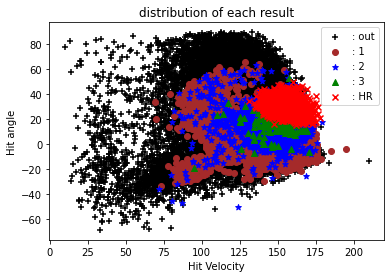

In [174]:
plt.scatter(base_0["HIT_VEL"], base_0["HIT_ANG_VER"], marker = '+', color = 'black', label = ': out')
plt.scatter(base_1["HIT_VEL"], base_1["HIT_ANG_VER"], marker = 'o', color = 'brown', label = ': 1 ')
plt.scatter(base_2["HIT_VEL"], base_2["HIT_ANG_VER"], marker = '*', color = 'blue', label = ': 2 ')
plt.scatter(base_3["HIT_VEL"], base_3["HIT_ANG_VER"], marker = '^', color = 'green', label = ': 3 ')
plt.scatter(base_4["HIT_VEL"], base_4["HIT_ANG_VER"], marker = 'x', color = 'red', label = ': HR')
plt.title("distribution of each result")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angle")
plt.legend()
plt.show()

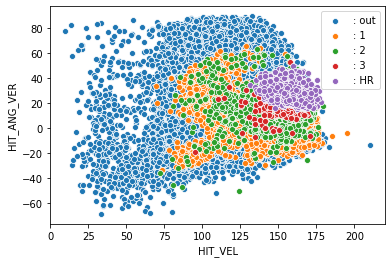

In [70]:
sns.scatterplot(base_0["HIT_VEL"], base_0["HIT_ANG_VER"], marker = '+', color = 'black', label = ': out')
sns.scatterplot(base_1["HIT_VEL"], base_1["HIT_ANG_VER"], marker = 'o', color = 'brown', label = ': 1 ')
sns.scatterplot(base_2["HIT_VEL"], base_2["HIT_ANG_VER"], marker = '*', color = 'blue',  label = ': 2 ')
sns.scatterplot(base_3["HIT_VEL"], base_3["HIT_ANG_VER"], marker = '^', color = 'green', label = ': 3 ')
sns.scatterplot(base_4["HIT_VEL"], base_4["HIT_ANG_VER"], marker = 'x', color = 'red',   label = ': HR')

In [111]:
def Simple(i, j):
    condition_0 = (base_0["HIT_VEL"] > i) & (base_0["HIT_VEL"] < i+19.999) & (base_0["HIT_ANG_VER"] < j+19.999) & (base_0["HIT_ANG_VER"] < j+19.999)
    condition_1 = (base_1["HIT_VEL"] > i) & (base_1["HIT_VEL"] < i+19.999) & (base_1["HIT_ANG_VER"] < j+19.999) & (base_1["HIT_ANG_VER"] < j+19.999)
    condition_2 = (base_2["HIT_VEL"] > i) & (base_2["HIT_VEL"] < i+19.999) & (base_2["HIT_ANG_VER"] < j+19.999) & (base_2["HIT_ANG_VER"] < j+19.999)
    condition_3 = (base_3["HIT_VEL"] > i) & (base_3["HIT_VEL"] < i+19.999) & (base_3["HIT_ANG_VER"] < j+19.999) & (base_3["HIT_ANG_VER"] < j+19.999)
    condition_4 = (base_4["HIT_VEL"] > i) & (base_4["HIT_VEL"] < i+19.999) & (base_4["HIT_ANG_VER"] < j+19.999) & (base_4["HIT_ANG_VER"] < j+19.999)
    
    a = len(base_0[condition_0])
    b = len(base_1[condition_1])
    c = len(base_2[condition_2])
    d = len(base_3[condition_3])
    e = len(base_4[condition_4])
    return a,b,c,d,e

2 0 0 0 0
5 0 0 0 0
8 0 0 0 0
9 0 0 0 0
10 0 0 0 0
11 0 0 0 0
14 0 0 0 0
15 0 0 0 0
26 0 0 0 0
73 0 0 0 0
120 0 0 0 0
161 0 0 0 0
185 0 0 0 0
198 0 0 0 0
206 0 0 0 0
208 0 0 0 0
42 0 0 0 0
135 0 0 0 0
180 0 0 0 0
206 0 0 0 0
226 0 0 0 0
250 0 0 0 0
262 0 0 0 0
264 0 0 0 0
35 0 0 0 0
356 1 2 0 0
547 2 2 0 0
621 3 2 0 0
697 5 2 0 0
774 6 2 0 0
822 6 2 0 0
832 6 2 0 0
12 0 2 0 0
505 39 6 0 0
1306 102 10 1 0
1540 156 15 1 0
1652 316 27 1 0
1876 343 31 1 0
2085 343 31 1 0
2135 343 31 1 0
8 0 0 0 0
173 10 0 0 0
1516 192 18 0 0
2079 748 55 0 0
2593 1283 99 3 0
3273 1370 119 3 0
3893 1371 119 3 0
4007 1371 119 3 0
2 0 1 0 0
173 18 3 0 0
1628 370 28 2 0
2555 1928 239 15 0
4814 2052 359 28 30
6404 2070 374 28 32
7200 2074 375 28 32
7297 2074 375 28 32
0 0 0 0 0
59 9 1 0 0
2175 1069 87 4 0
3760 3590 974 69 15
5501 3645 1588 131 1101
6416 3649 1603 134 1146
6602 3649 1603 134 1146
6607 3649 1603 134 1146
0 0 0 0 0
5 2 1 0 0
474 371 23 1 0
783 954 348 12 54
806 959 387 14 508
839 959 388 14 527
839

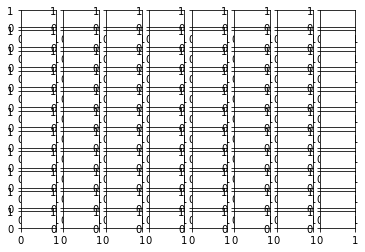

In [114]:
y_vertical = [-60,-40,-20,0,20,40,60,80]
x_vertical = [0, 20,40,60,80,100,120,140,160,180,200]
fig, ax = plt.subplots(len(x_vertical), len(y_vertical))

for i in range(len(x_vertical)):
    for j in range(len(y_vertical)):
        a,b,c,d,e = Simple(x_vertical[i], y_vertical[j])
        
        ax[i][j] = sns.barplot(["out","1","2","3","HR"], y= [a,b,c,d,e])
        
        

In [126]:
def Simple1(i, j):
    condition = (da_2018ver["HIT_VEL"] > i) & (da_2018ver["HIT_VEL"] < i+19.999) & (da_2018ver["HIT_ANG_VER"] < j+19.999) & (da_2018ver["HIT_ANG_VER"] < j+19.999)
     
    return da_2018ver[condition]

In [125]:
A = {}

for i in da_2018ver["HIT_RESULT"].unique():
    if i =='1루타':
        A[i] = 1
    elif i =='2루타':
        A[i] = 2
    elif i =='3루타':
        A[i] = 3
    
    elif i =='홈런':
        A[i] = 4
    
    else:
        A[i] = 0
        
        
da_2018ver["HIT_RESULT"].map(A)
da_2018ver

,PCODE,NAME,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,Result
0,62797,양성우,131.50,42.7,플라이,149.59,고척,0
1,76753,송광민,135.18,9.9,1루타,148.78,고척,1
2,71752,김태균,152.41,2.1,1루타,148.59,고척,1
3,62700,하주석,113.72,13.5,1루타,139.13,고척,1
4,68730,호잉,54.11,16.4,번트안타,134.07,고척,0
...,...,...,...,...,...,...,...,...
35024,75334,오재일,161.12,-7.4,1루타,145.81,사직,1
35025,68205,전민재,131.71,26.4,플라이,146.38,사직,0
35026,76509,김문호,119.64,28.8,플라이,141.23,사직,0
35027,60523,정훈,164.98,15.7,직선타,125.59,사직,0


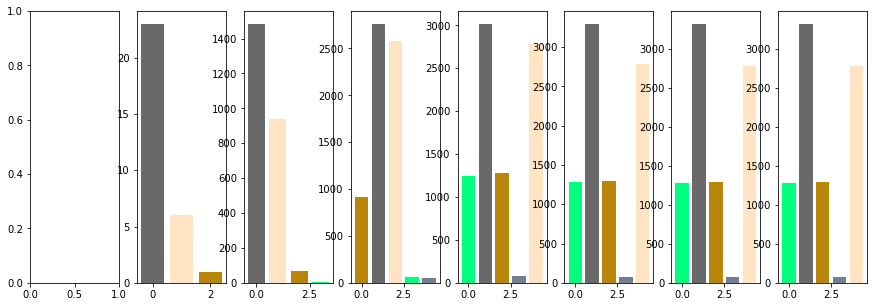

In [172]:
y_vertical = [-60,-40,-20,0,20,40,60,80]
x_vertical = [0, 20,40,60,80,100,120,140,160,180,200]
fig, ax = plt.subplots(ncols=8, figsize = (15,5))

for j in range(len(y_vertical)):
    K =  Simple1(150, y_vertical[j])

    if len(K) != 0:
        ax[j].bar( K["Result"].unique(), height= K["Result"].value_counts() , color = ['dimgray','bisque','darkgoldenrod','springgreen','slategrey'] )
        
        

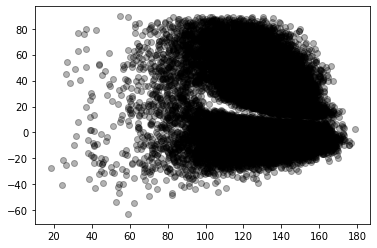

In [181]:
# mapping index
a = {}
for i in range(len(da_member2)):
    a[da_member2["PCODE"][i]] = da_member2["NAME"][i]

# mapping 
P_to_N = []
for i in da_HTS2["PCODE"]:
    P_to_N.append(a.get(i))
    
indexs = [3,6,7,8,9,10]
da_HTS2.iloc[:,indexs]


da_2019ver = da_HTS2.iloc[:,indexs]
#da_2018ver["NAME"] = P_to_N
da_2019ver.insert(1,"NAME", P_to_N)
da_2019ver

da_2019ver.iloc[:,2:5]

condition = (da_2019ver["HIT_RESULT"] !="1루타") & (da_2019ver["HIT_RESULT"] !="2루타") & (da_2019ver["HIT_RESULT"] !="3루타") & (da_2019ver["HIT_RESULT"] !="홈런")
base_0 = da_2019ver[condition]

plt.scatter(base_0["HIT_VEL"], base_0["HIT_ANG_VER"], marker = 'o', color = 'black', alpha = 0.3)

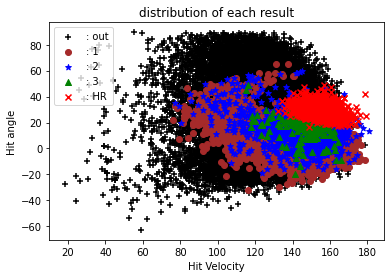

In [182]:
base_1 = da_2019ver[da_2019ver["HIT_RESULT"] =="1루타"]
base_2 = da_2019ver[da_2019ver["HIT_RESULT"] =="2루타"]
base_3 = da_2019ver[da_2019ver["HIT_RESULT"] =="3루타"]
base_4 = da_2019ver[da_2019ver["HIT_RESULT"] =="홈런"]

#plt.scatter(base_1["HIT_VEL"], base_1["HIT_ANG_VER"], 'ro')

plt.scatter(base_0["HIT_VEL"], base_0["HIT_ANG_VER"], marker = '+', color = 'black', label = ': out')
plt.scatter(base_1["HIT_VEL"], base_1["HIT_ANG_VER"], marker = 'o', color = 'brown', label = ': 1 ')
plt.scatter(base_2["HIT_VEL"], base_2["HIT_ANG_VER"], marker = '*', color = 'blue', label = ': 2 ')
plt.scatter(base_3["HIT_VEL"], base_3["HIT_ANG_VER"], marker = '^', color = 'green', label = ': 3 ')
plt.scatter(base_4["HIT_VEL"], base_4["HIT_ANG_VER"], marker = 'x', color = 'red', label = ': HR')
plt.title("distribution of each result")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angle")
plt.legend()
plt.show()